In [2]:
# 1. Install necessary packages
!pip install pmdarima --quiet

# 2. Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")

# 3. Load the dataset
# If using locally, make sure the file path is correct
df = pd.read_csv("/Users/vyadav/Downloads/GlobalTemperatures.csv")

# 4. Display first few rows
df.head()


,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# 5. Basic info and structure of dataset
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3192 entries, 0 to 3191
Data columns (total 9 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   dt                                         3192 non-null   object 
 1   LandAverageTemperature                     3180 non-null   float64
 2   LandAverageTemperatureUncertainty          3180 non-null   float64
 3   LandMaxTemperature                         1992 non-null   float64
 4   LandMaxTemperatureUncertainty              1992 non-null   float64
 5   LandMinTemperature                         1992 non-null   float64
 6   LandMinTemperatureUncertainty              1992 non-null   float64
 7   LandAndOceanAverageTemperature             1992 non-null   float64
 8   LandAndOceanAverageTemperatureUncertainty  1992 non-null   float64
dtypes: float64(8), object(1)
memory usage: 224.6+ KB


In [4]:
# 6. Check missing values
df.isnull().sum()


dt                                              0
LandAverageTemperature                         12
LandAverageTemperatureUncertainty              12
LandMaxTemperature                           1200
LandMaxTemperatureUncertainty                1200
LandMinTemperature                           1200
LandMinTemperatureUncertainty                1200
LandAndOceanAverageTemperature               1200
LandAndOceanAverageTemperatureUncertainty    1200
dtype: int64

In [5]:
# 7. Convert 'dt' column to datetime
df['dt'] = pd.to_datetime(df['dt'])

# 8. Set datetime column as index
df.set_index('dt', inplace=True)

# 9. Focus on LandAverageTemperature column
temp_df = df[['LandAverageTemperature']].copy()

# 10. Drop rows with missing temperature values
temp_df.dropna(inplace=True)

# 11. Resample data to monthly (mean) — optional
temp_df = temp_df.resample('M').mean()

# 12. Display final cleaned dataset
temp_df.head()


,LandAverageTemperature
dt,
1750-01-31,3.034
1750-02-28,3.083
1750-03-31,5.626
1750-04-30,8.490
1750-05-31,11.573


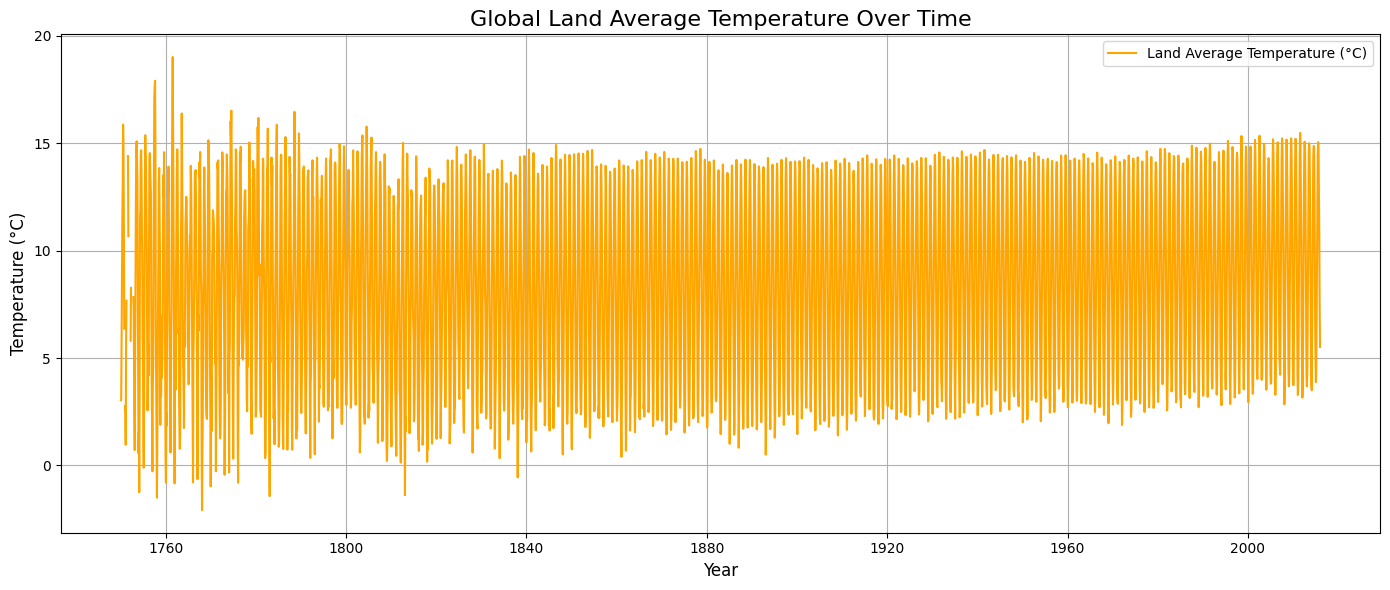

In [6]:
# 13. Plotting the temperature trend
plt.figure(figsize=(14,6))
plt.plot(temp_df, color='orange', linewidth=1.5, label='Land Average Temperature (°C)')
plt.title('Global Land Average Temperature Over Time', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Temperature (°C)', fontsize=12)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [7]:
!pip show pmdarima


Name: pmdarima
Version: 2.0.4
Summary: Python's forecast::auto.arima equivalent
Home-page: http://alkaline-ml.com/pmdarima
Author: 
Author-email: 
License: MIT
Location: /Users/vyadav/Library/Python/3.9/lib/python/site-packages
Requires: Cython, joblib, numpy, packaging, pandas, scikit-learn, scipy, setuptools, statsmodels, urllib3
Required-by: 


In [22]:
!pip uninstall -y numpy pmdarima
!pip install numpy==1.23.5
!pip install --no-cache-dir --no-binary :all: pmdarima==2.0.3

Found existing installation: numpy 1.23.5
Uninstalling numpy-1.23.5:
  Successfully uninstalled numpy-1.23.5
Found existing installation: pmdarima 2.0.4
Uninstalling pmdarima-2.0.4:
  Successfully uninstalled pmdarima-2.0.4
Defaulting to user installation because normal site-packages is not writeable
  Using cached numpy-1.23.5-cp39-cp39-macosx_11_0_arm64.whl.metadata (2.3 kB)
Using cached numpy-1.23.5-cp39-cp39-macosx_11_0_arm64.whl (13.4 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.19.0 requires numpy<2.2.0,>=1.26.0, but you have numpy 1.23.5 which is incompatible.
Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 630.9/630.9 kB 33.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did no

In [8]:
pip install pmdarima


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [9]:
# 14. Import modeling tools
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima import auto_arima
from sklearn.metrics import mean_squared_error

# 15. Split data into training and testing
train = temp_df.iloc[:-120]  # training on all but last 10 years (120 months)
test = temp_df.iloc[-120:]   # testing on last 10 years

# 16. Fit auto_arima to determine best parameters
stepwise_model = auto_arima(train,
                            start_p=1, start_q=1,
                            max_p=3, max_q=3,
                            seasonal=True,
                            m=12,
                            trace=True,
                            error_action='ignore',  
                            suppress_warnings=True,
                            stepwise=True)

# 17. Print best model
print(stepwise_model.summary())


ValueError: Input contains NaN.